In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Food%20Composition/Food%20Composition.csv")
data.head()

,Public Food Key,Food Profile ID,Derivation,Food Name,Food Description,Sampling Details,Nitrogen Factor,Fat Factor,Specific Gravity,Analysed Portion,Unanalysed Portion,Classification,Classification Name
0,F002258,14723,Borrowed,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
1,F002963,14718,Borrowed,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
2,F002970,14725,Borrowed,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
3,F003190,14727,Borrowed,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
4,F003327,14728,Borrowed,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Public Food Key      1561 non-null   object 
 1   Food Profile ID      1561 non-null   int64  
 2   Derivation           1561 non-null   object 
 3   Food Name            1561 non-null   object 
 4   Food Description     1561 non-null   object 
 5   Sampling Details     1561 non-null   object 
 6   Nitrogen Factor      1561 non-null   float64
 7   Fat Factor           1561 non-null   float64
 8   Specific Gravity     1561 non-null   float64
 9   Analysed Portion     1561 non-null   object 
 10  Unanalysed Portion   1561 non-null   object 
 11  Classification       1561 non-null   int64  
 12  Classification Name  1561 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 158.7+ KB


In [5]:
data.drop(['Public Food Key','Food Profile ID','Derivation', 'Sampling Details', 'Nitrogen Factor', 'Fat Factor',
       'Specific Gravity', 'Analysed Portion', 'Unanalysed Portion','Classification'],axis=1,inplace=True)
data.head()

,Food Name,Food Description,Classification Name
0,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [6]:
data['Food Name'] = data['Food Name'].apply(lambda text: ' '.join([remove_stopwords(item).translate(str.maketrans('','',string.punctuation))\
                                    .translate(str.maketrans('','',string.digits)) for item in text.split()]))
data.head()

,Food Name,Food Description,Classification Name
0,Cardamom seed dried ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,Cinnamon dried ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,Cloves dried ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,Coriander seed dried ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,Cumin cummin seed dried ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [7]:
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

data['Food Name'] = data['Food Name'].apply(lambda text: stemSentence(text))
data.head()

,Food Name,Food Description,Classification Name
0,cardamom seed dri ground,Ground spice commonly used in Indian cooking a...,Herbs(dried) and spices
1,cinnamon dri ground,Dried and ground bark or quills of Cinnamomum ...,Herbs(dried) and spices
2,clove dri ground,"Dried and ground, unopened flower buds of Syzy...",Herbs(dried) and spices
3,coriand seed dri ground,Dried and ground fruit or seed of Coriandrum s...,Herbs(dried) and spices
4,cumin cummin seed dri ground,Dried and ground fruit or seeds of Cuminum cym...,Herbs(dried) and spices


In [8]:
vectorizer = TfidfVectorizer(analyzer='word')
X = vectorizer.fit_transform(data['Food Name'])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


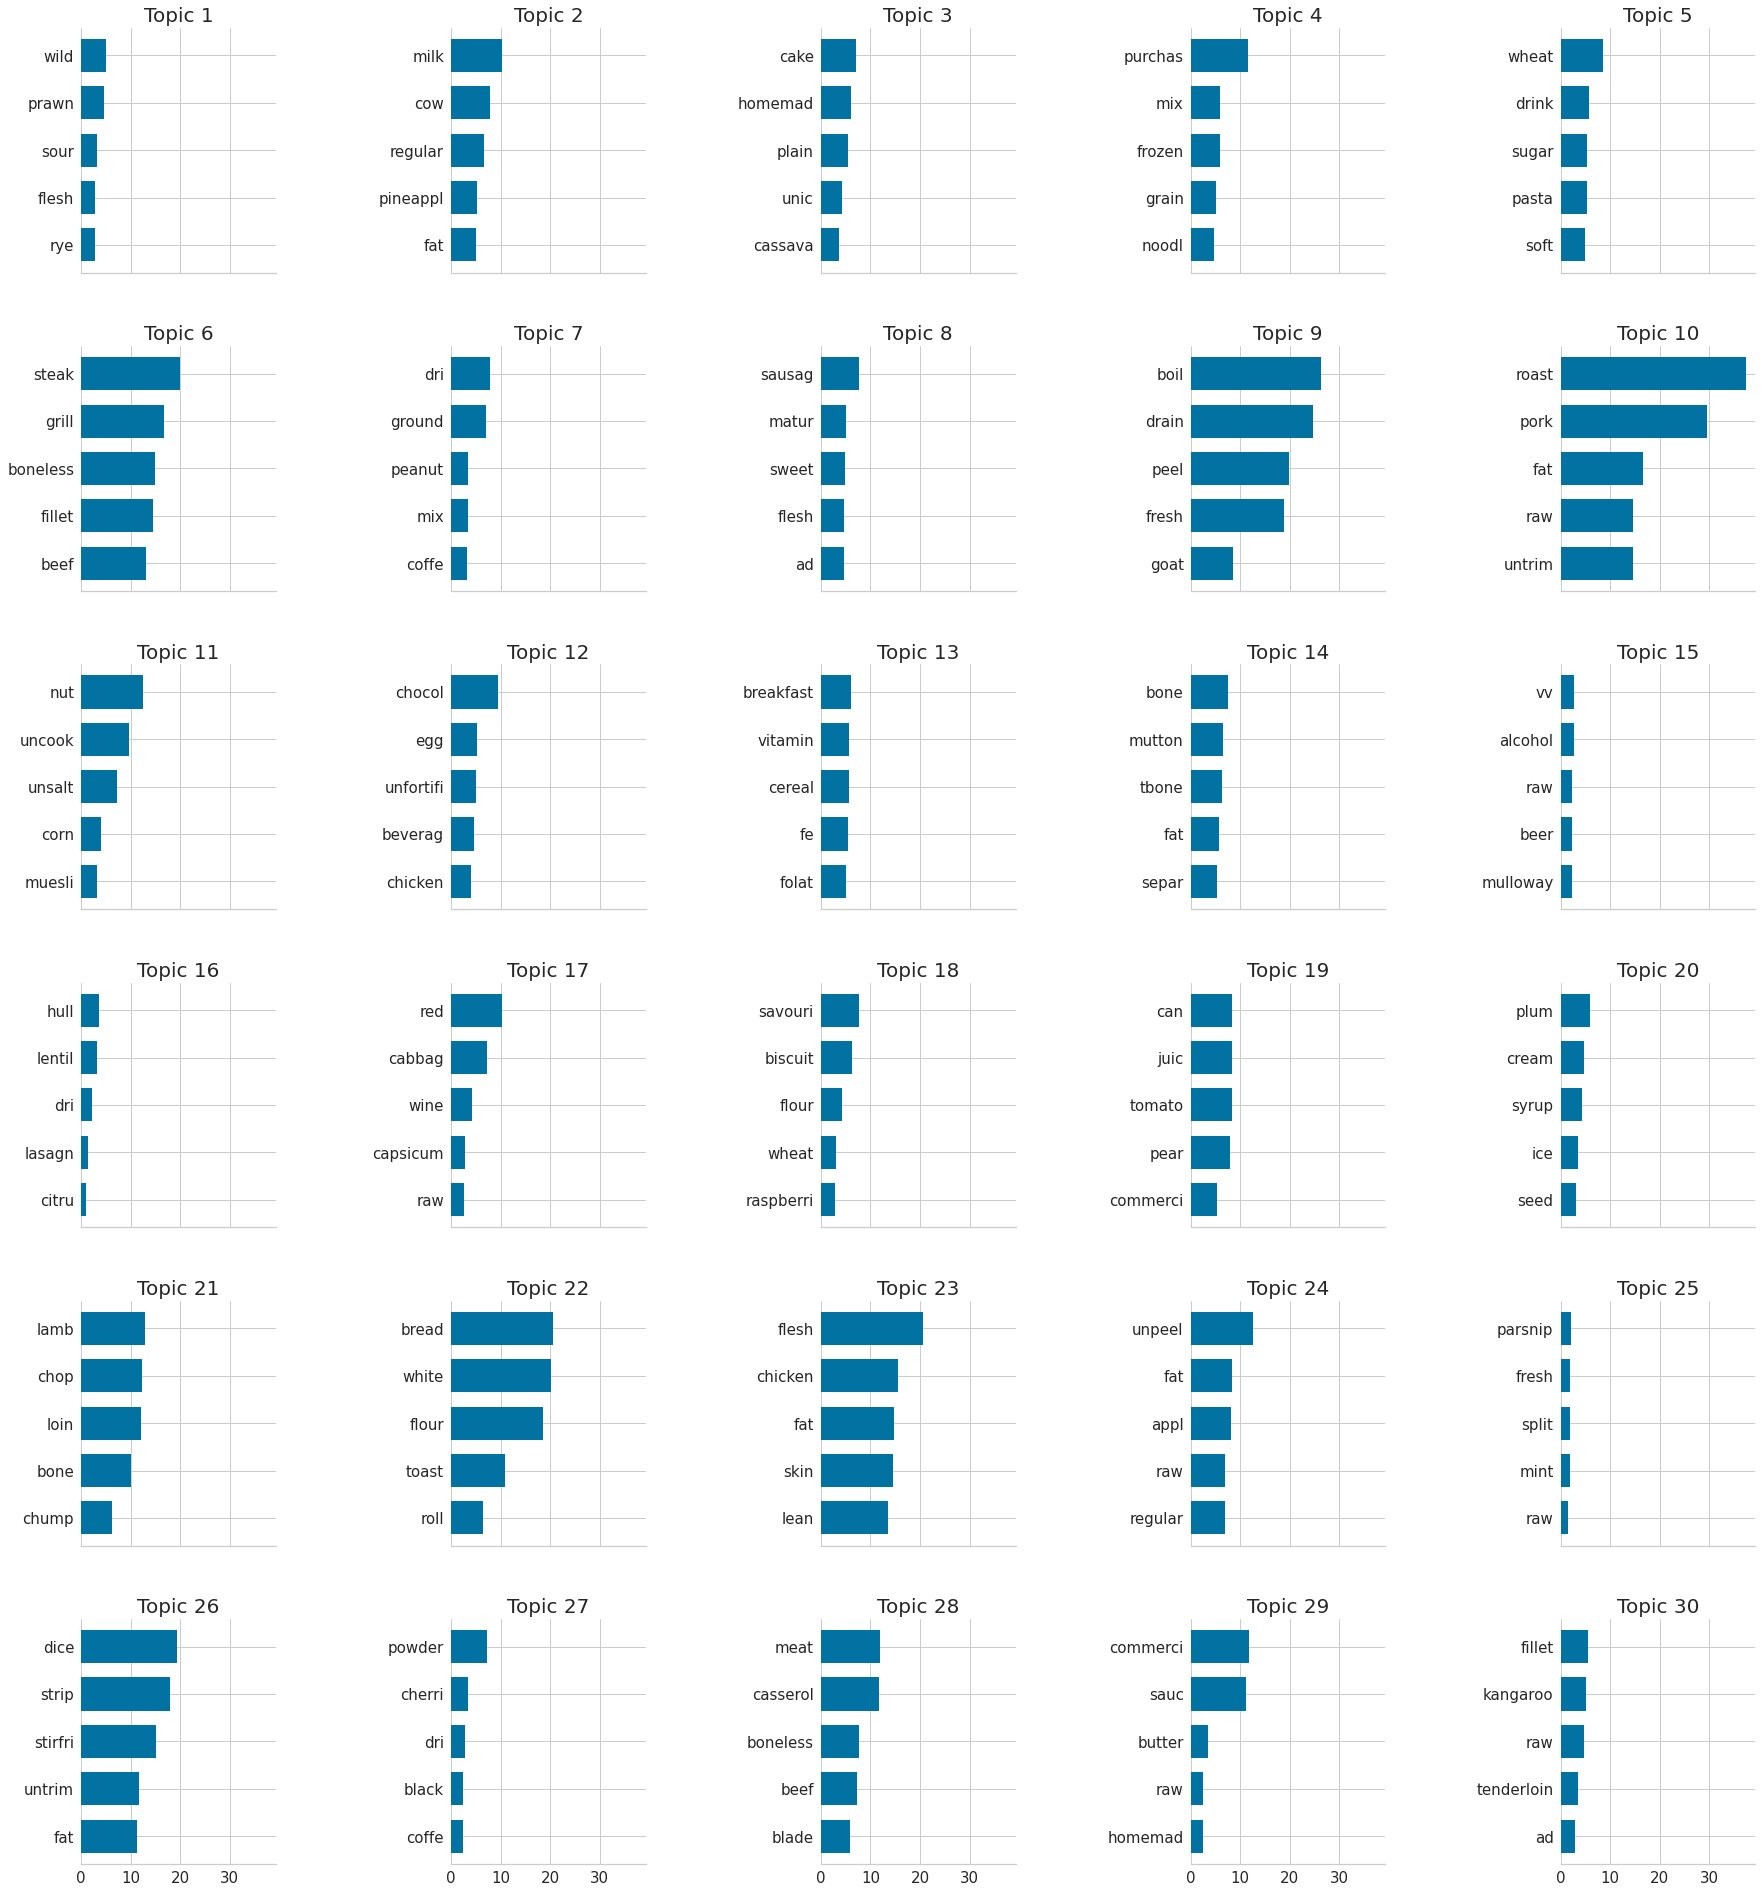

In [9]:
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=15)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
n_top_words = 5
feature_names = vectorizer.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn

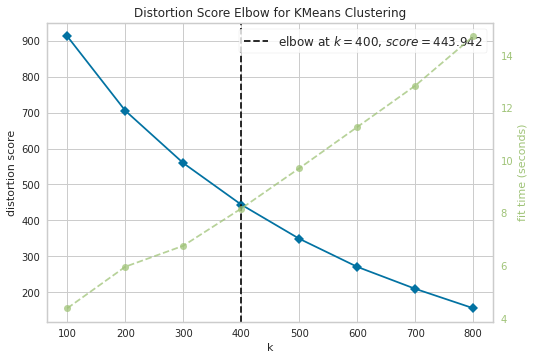

In [10]:
elbow = KElbowVisualizer(KMeans(), k=np.arange(100,900,100))
elbow.fit(X)
elbow.show();

In [11]:
kmeans = KMeans(n_clusters=400)
kmeans.fit(X)
result = pd.concat([data['Food Name'],pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Name' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')
result_labelled.head()

,Food Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,...,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini,cluster,label
0,cardamom seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,seed
1,cinnamon dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283,dri ground
2,clove dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283,dri ground
3,coriand seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,seed
4,cumin cummin seed dri ground,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,seed


In [13]:
result_summary = pd.pivot_table(result_labelled,index=['label','cluster'],values=['Food Name'],aggfunc='count').reset_index().rename(columns={'Food Name':'count'})
result_treemap = result_summary[(result_summary['label'] != '') & (result_summary['count'] > 1)]
fig = px.treemap(result_treemap,path=['cluster','label'],values='count')
fig.show();

In [14]:
result_labelled[['Food Name','cluster','label']]

,Food Name,cluster,label
0,cardamom seed dri ground,64,seed
1,cinnamon dri ground,283,dri ground
2,clove dri ground,283,dri ground
3,coriand seed dri ground,64,seed
4,cumin cummin seed dri ground,64,seed
...,...,...,...
1556,kangaroo rump raw,48,kangaroo
1557,kangaroo steak purchas fri ad fat,48,kangaroo
1558,kangaroo steak purchas raw,48,kangaroo
1559,kombucha flavour ad juic intens sweeten,28,intens sweeten
